In [301]:
## Our goal is to predict the android market applications ratings in order to bring more business and profit for the android apps building companies

In [302]:
## Importing the necessary libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import os
import re
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.svm import SVC
%matplotlib inline

### Data Collection

In [303]:
## creating a dataframe and importing the titanic dataset.

#Current working directory and file path
current_wd= os.getcwd() 

#Read train CSV from Filepath
file_path1= os.path.join(current_wd,'googleplaystore.csv') 
gps_df = pd.read_csv(filepath_or_buffer=file_path1,sep=',') 

gps_df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [304]:
gps_df.shape

(10841, 13)

In [305]:
gps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [306]:
# Makign a copy of the original dataframe
gps_df_copy = gps_df.copy()

### Data Cleaning 

In [307]:
## checking missing values 
total = gps_df.isnull().sum().sort_values(ascending = False)
percent = round(gps_df.isnull().sum().sort_values(ascending = False)/len(gps_df)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Rating,1474,13.60
Current Ver,8,0.07
Android Ver,3,0.03
Content Rating,1,0.01
Type,1,0.01
Last Updated,0,0.00
Genres,0,0.00
Price,0,0.00
Installs,0,0.00
Size,0,0.00


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

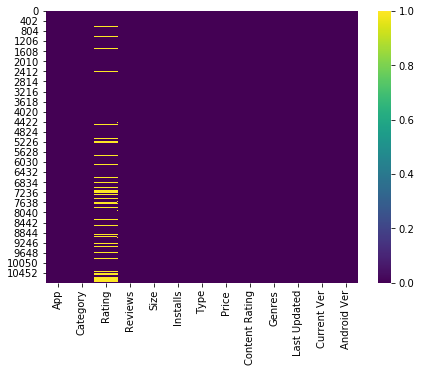

In [308]:
# Exploring missing data and checking if any has NaN values
plt.figure(figsize=(7, 5))
sns.heatmap(gps_df.isnull(), cmap='viridis')
gps_df.isnull().any()

In [309]:
print(list(gps_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [310]:
## Renaming column names for easy access
gps_df = gps_df_copy
gps_df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver']

In [311]:
# Printing renamed column values
print(list(gps_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver']


In [312]:
# Checking the null values in the rating column
gps_df[gps_df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [313]:
# Fill the Rating null values with median rating value
gps_df.Rating.fillna(gps_df.Rating.median(),inplace=True)

In [314]:
## checking missing values 
total = gps_df.isnull().sum().sort_values(ascending = False)
percent = round(gps_df.isnull().sum().sort_values(ascending = False)/len(gps_df)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Current_Ver,8,0.07
Android_Ver,3,0.03
Content_Rating,1,0.01
Type,1,0.01
Last_Updated,0,0.00
Genres,0,0.00
Price,0,0.00
Installs,0,0.00
Size,0,0.00
Reviews,0,0.00


In [315]:
gps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [316]:
# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    gps_df['Current_Ver'] = gps_df['Current_Ver'].astype(str).apply(lambda x : x.replace(i, ''))

    regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    gps_df['Current_Ver'] = gps_df['Current_Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

gps_df['Current_Ver'] = gps_df['Current_Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
gps_df['Current_Ver'] = gps_df['Current_Ver'].fillna(gps_df['Current_Ver'].median())

In [317]:
gps_df['Current_Ver'].unique()

array([1.       , 2.       , 1.24     , ..., 1.0612928, 0.34     ,
       2.0148   ])

In [318]:
## As we can see that there is only some rows with null values we can drop that row without affecting our analysis
gps_df = gps_df.dropna(how='any',axis=0)

In [319]:
## checking missing values 
total = gps_df.isnull().sum().sort_values(ascending = False)
percent = round(gps_df.isnull().sum().sort_values(ascending = False)/len(gps_df)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Android_Ver,0,0.0
Current_Ver,0,0.0
Last_Updated,0,0.0
Genres,0,0.0
Content_Rating,0,0.0
Price,0,0.0
Type,0,0.0
Installs,0,0.0
Size,0,0.0
Reviews,0,0.0


In [320]:
gps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up


### EDA

In [321]:
gps_df['Rating'].describe()

count    10837.000000
mean         4.206422
std          0.480396
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

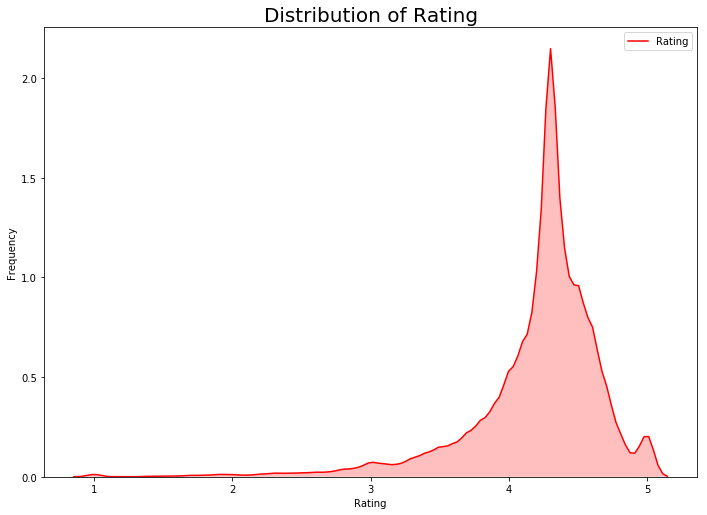

In [322]:
# rating distibution 
from pylab import rcParams
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(gps_df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [323]:
# Average of rating of application in store is around 4 which is very high

In [324]:
print( len(gps_df['Category'].unique()) , "categories")

print("\n", gps_df['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

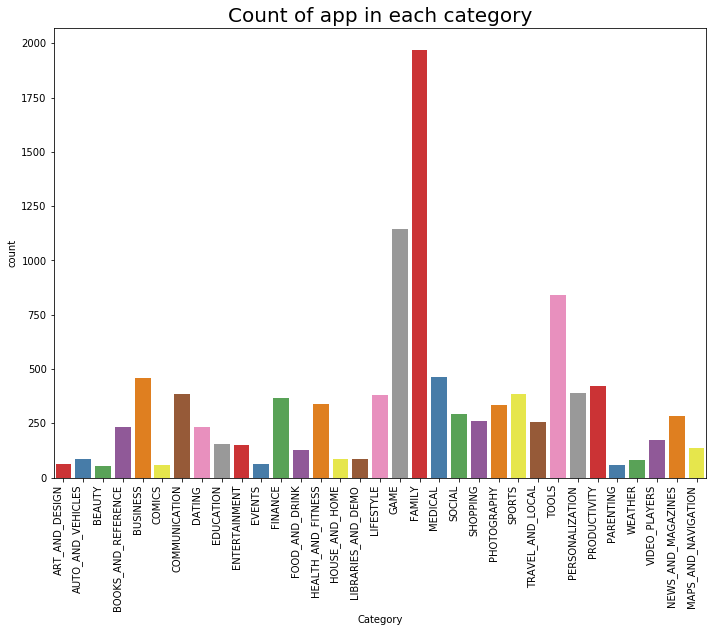

In [325]:
plot1 = sns.countplot(x="Category",data=gps_df, palette = "Set1")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right")
plot1
plt.title('Count of app in each category',size = 20)

In [326]:
# Game and Family category are the most appearances for application in store

In [327]:
gps_df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

C:\Users\18572\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Distribution of Reveiw')

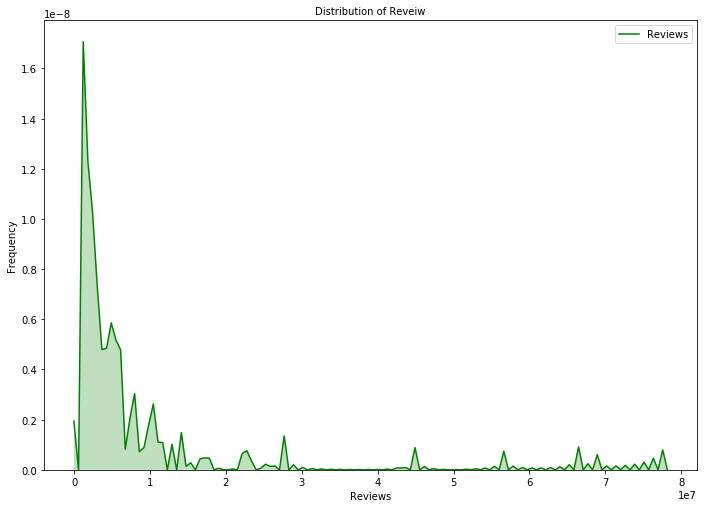

In [328]:
# The data is in object type, so converting it into int

gps_df['Reviews'] = gps_df['Reviews'].apply(lambda x: int(x))

# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
plot2 = sns.kdeplot(gps_df.Reviews, color="Green", shade = True)
plot2.set_xlabel("Reviews")
plot2.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 10)

In [329]:
gps_df[gps_df.Reviews > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",0.0,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",0.0,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",0.0,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",0.0,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",0.0,Varies with device


In [330]:
## Therefore, majority of application has less than 1 million reviews. Only well known applications have a lot of reviews


Text(0.5, 1.0, 'Rating VS Reveiws')

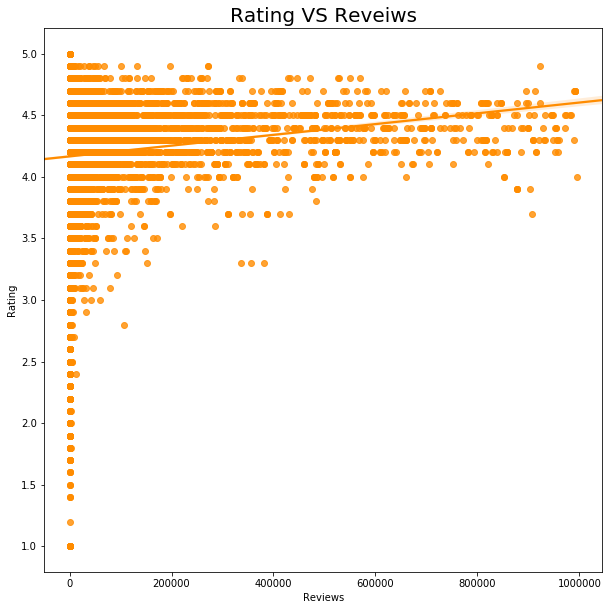

In [331]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=gps_df[gps_df['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

In [332]:
# Seem like well-known application will get a good rating

In [333]:
gps_df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [334]:
gps_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [335]:
# Data still in object type, and contain the metric symbol for the perefix, and special size which are "Varies with device" that we need to deal with it.

In [336]:
## Finding the length of data wit "Varies with device"
len(gps_df[gps_df.Size == 'Varies with device'])

1694

In [337]:
# change it to NA first

gps_df['Size'].replace('Varies with device', np.nan, inplace = True ) 

C:\Users\18572\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [338]:
gps_df.Size = (gps_df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             gps_df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

## Replacing those values with the mean value
gps_df['Size'].fillna(gps_df.groupby('Category')['Size'].transform('mean'),inplace = True)

C:\Users\18572\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\18572\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


C:\Users\18572\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

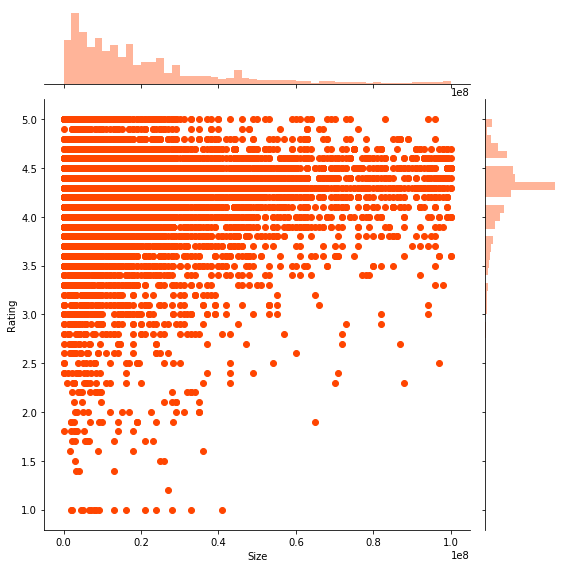

In [339]:
plt.figure(figsize = (10,10))
plot3 = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=gps_df, size = 8);

In [340]:
gps_df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [341]:
gps_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [342]:
# I changed the value from string to number as mentioned below 
# ex: 0 refer to 1+
#     1 refer to 5+
#     2 refer  to 10+
#     .

gps_df.Installs = gps_df.Installs.apply(lambda x: x.replace(',',''))
gps_df.Installs = gps_df.Installs.apply(lambda x: x.replace('+',''))
gps_df.Installs = gps_df.Installs.apply(lambda x: int(x))

In [343]:
gps_df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [344]:
sorted_value = sorted(list(gps_df['Installs'].unique()))
gps_df['Installs'].replace(sorted_value,range(0,len(sorted_value),1), inplace = True )
gps_df['Installs'].head()

0     9
1    12
2    14
3    16
4    11
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

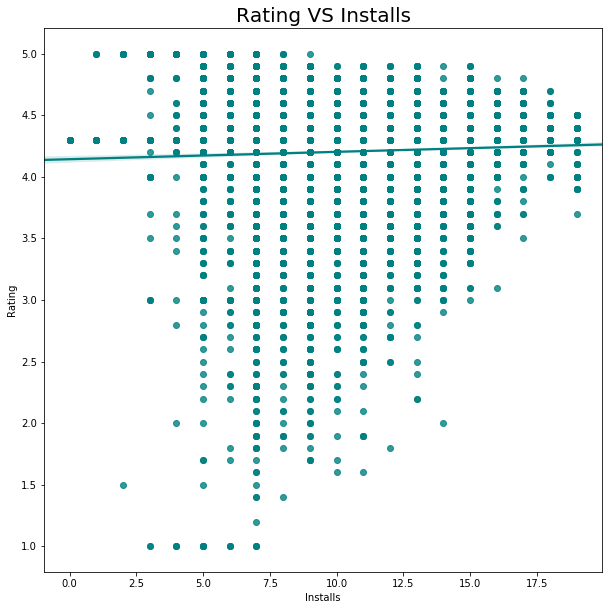

In [345]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=gps_df);
plt.title('Rating VS Installs',size = 20)

In [346]:
# From the above plot we can say that the number of install affect to rating

In [347]:
gps_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

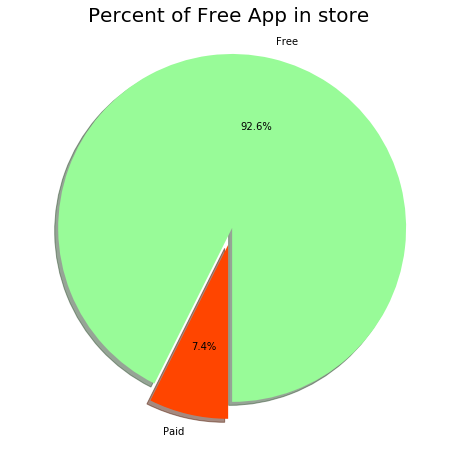

In [348]:
# Data to plot
labels =gps_df['Type'].value_counts(sort = True).index
sizes = gps_df['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

In [349]:
# Most of application in this store are free (93.1%).

In [350]:
# Chaning the price data type from string to int

gps_df['Free'] = gps_df['Type'].map(lambda s :1  if s =='Free' else 0)
#gps_df.drop(['Type'], axis=1, inplace=True)

C:\Users\18572\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [351]:
gps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,9,Free,0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,12,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,14,Free,0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,16,Free,0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,11,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up,1


In [352]:
gps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver       float64
Android_Ver        object
Free                int64
dtype: object

In [353]:
gps_df['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [354]:
gps_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [355]:
gps_df['Price'].value_counts().head(5)

0        10038
$0.99      148
$2.99      129
$1.99       73
$4.99       72
Name: Price, dtype: int64

In [356]:
# Converting price from object to float
gps_df.Price = gps_df.Price.apply(lambda x: x.replace('$',''))
gps_df['Price'] = gps_df['Price'].apply(lambda x: float(x))

C:\Users\18572\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [357]:
gps_df['Price'].describe()

count    10837.000000
mean         1.027515
std         15.951904
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [358]:
#Average of price is around 1.02, but most of them are free (10032 from 10829).
#The most expensive app is 400 dollar.

In [359]:
gps_df[gps_df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,9,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.01,4.1 and up,0


In [360]:
# Creating a price band for checking the impact of price on app ratings
gps_df.loc[ gps_df['Price'] == 0, 'PriceBand'] = '0 Free'
gps_df.loc[(gps_df['Price'] > 0) & (gps_df['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
gps_df.loc[(gps_df['Price'] > 0.99) & (gps_df['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
gps_df.loc[(gps_df['Price'] > 2.99) & (gps_df['Price'] <= 4.99), 'PriceBand']   = '3 normal'
gps_df.loc[(gps_df['Price'] > 4.99) & (gps_df['Price'] <= 14.99), 'PriceBand']   = '4 High'
gps_df.loc[(gps_df['Price'] > 14.99) & (gps_df['Price'] <= 29.99), 'PriceBand']   = '5 Expensive'
gps_df.loc[(gps_df['Price'] > 29.99), 'PriceBand']  = '6 Too expensive'

## Groupinh the data with respect to their mean value
gps_df[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

C:\Users\18572\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


,PriceBand,Rating
0,0 Free,4.201136
1,1 cheap,4.298649
2,2 not cheap,4.294295
3,3 normal,4.253293
4,4 High,4.276423
5,5 Expensive,4.262500
6,6 Too expensive,4.045161


Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

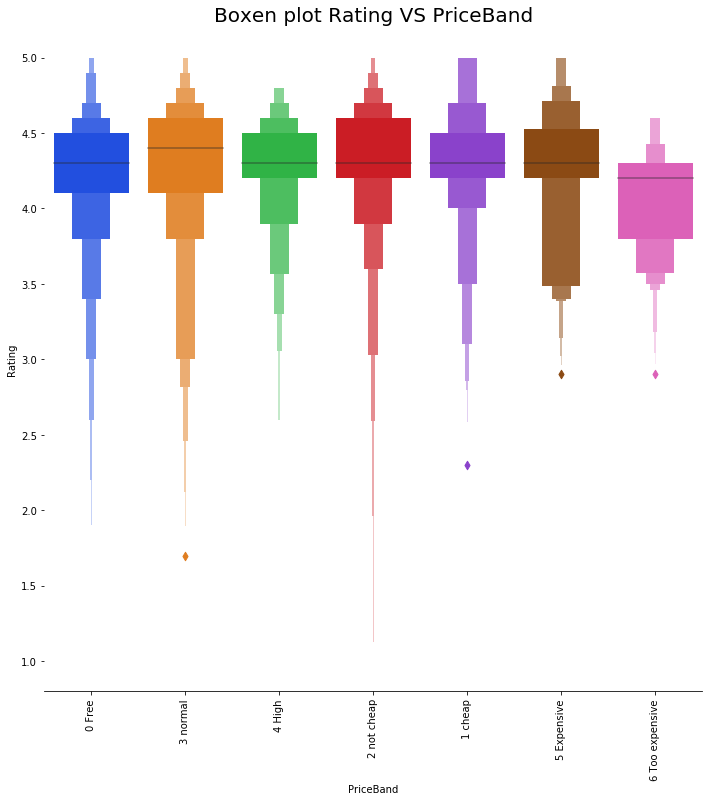

In [361]:
plot4 = sns.catplot(x="PriceBand",y="Rating",data=gps_df, kind="boxen", height = 10 ,palette = "bright")
plot4.despine(left=True)
plot4.set_xticklabels(rotation=90)
plot4 = plot4.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

In [362]:
# Price are not effect to rating ,but if it is very expensive, it might get low rating

In [363]:
gps_df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

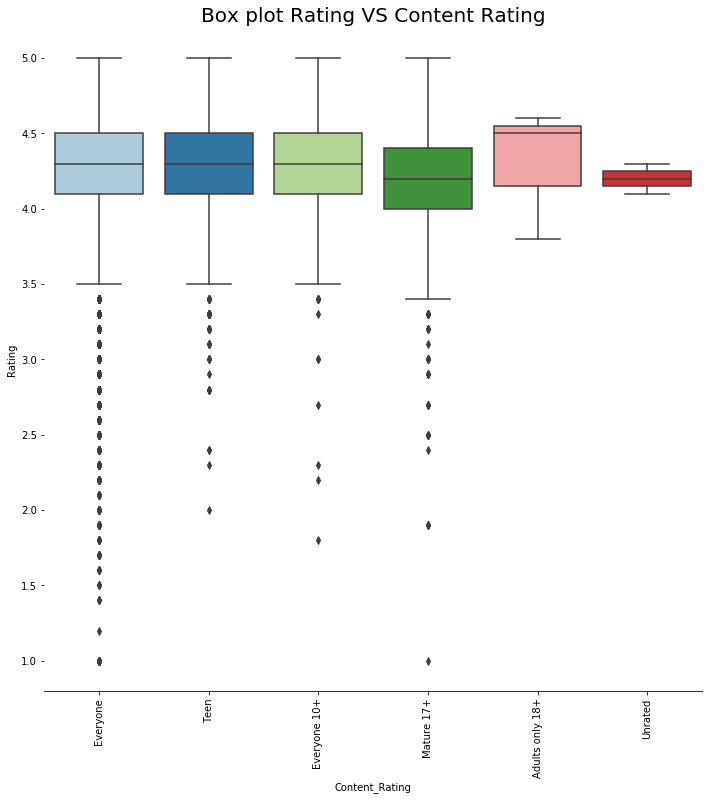

In [364]:
plot5 = sns.catplot(x="Content_Rating",y="Rating",data=gps_df, kind="box", height = 10 ,palette = "Paired")
plot5.despine(left=True)
plot5.set_xticklabels(rotation=90)
plot5 = plot5.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

In [365]:
#Content Rating not effect too much to rating, but in Mature and unrated applications ,look like they get lower rating than other.

In [366]:
gps_df[gps_df['Content_Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Free,PriceBand
7312,Best CG Photography,FAMILY,4.3,1,2500000.0,6,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up,1,0 Free
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,10,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Free


In [367]:
print( len(gps_df['Genres'].unique()) , "genres")

print("\n", gps_df['Genres'].unique())

119 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creati

In [368]:
gps_df.Genres.value_counts().head(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    390
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

In [369]:
gps_df.Genres.value_counts().tail(10)

Strategy;Education                     1
Card;Brain Games                       1
Board;Pretend Play                     1
Health & Fitness;Education             1
Puzzle;Education                       1
Arcade;Pretend Play                    1
Comics;Creativity                      1
Health & Fitness;Action & Adventure    1
Travel & Local;Action & Adventure      1
Communication;Creativity               1
Name: Genres, dtype: int64

In [370]:
# Many genre contain only few record, it may make a bias. Then, I decide to group it to bigger genre by ignore sub-genre (after " ; " sign)

In [371]:
## Making a bigger group for genres
gps_df['Genres'] = gps_df['Genres'].str.split(';').str[0]
print( len(gps_df['Genres'].unique()) , "genres")

print("\n", gps_df['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


C:\Users\18572\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [372]:
gps_df.Genres.value_counts().tail(10)

Board            63
Comics           60
Parenting        60
Beauty           53
Card             51
Casino           39
Trivia           39
Word             29
Music            25
Music & Audio     1
Name: Genres, dtype: int64

In [373]:
# Group Music & Audio  as  Music

gps_df['Genres'].replace('Music & Audio', 'Music',inplace = True)
gps_df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.221962
std,0.088369
min,4.025641
25%,4.160919
50%,4.216199
75%,4.284965
max,4.406897


In [374]:
gps_df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)

,Genres,Rating
14,Dating,4.025641


In [375]:
gps_df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

,Genres,Rating
46,Word,4.406897


Text(0.5, 1.0, 'Boxenplot of Rating VS Genres')

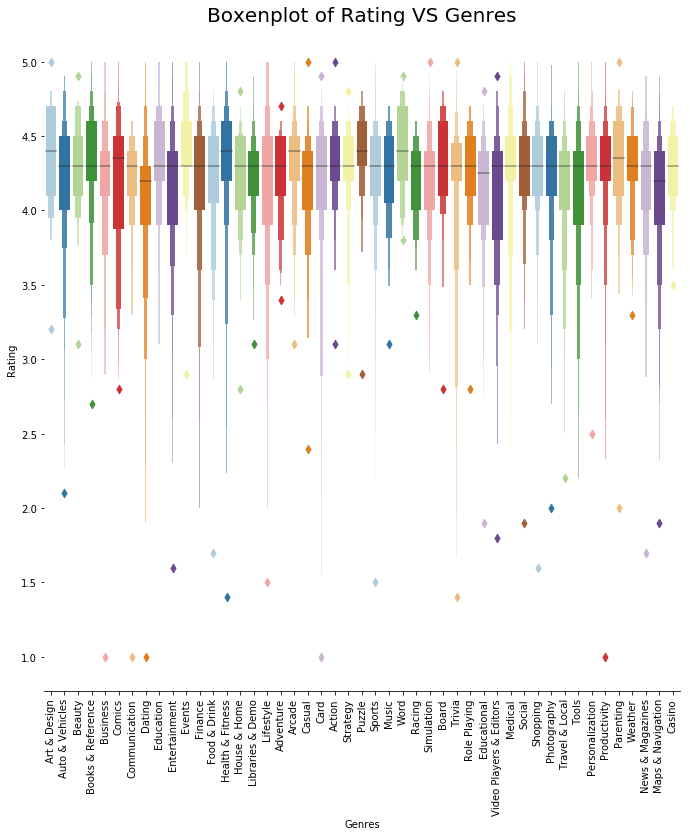

In [376]:
# Observing from Standard Deviation, seem like genre is not effect too much to rating.
# The lowest of an average rating on genres (Dating) is 4.02
# while the highest (Word) is 4.40

plot6 = sns.catplot(x="Genres",y="Rating",data=gps_df, kind="boxen", height = 10 ,palette = "Paired")
plot6.despine(left=True)
plot6.set_xticklabels(rotation=90)
plot6 = plot6.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size = 20)

In [377]:
gps_df['Last_Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

In [378]:
# "Last Updated" feature still in Obect typet, we need to change it in someway for plot or put it in model
# I created a new feature called as "lastupdate",
# "Modified_Last_Update" will contain how long is this app got update in last time (... days ago).

gps_df['new'] = pd.to_datetime(gps_df['Last_Updated'])
gps_df['new'].describe()

C:\Users\18572\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


count                   10837
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [379]:
# new format of  Last Updated
gps_df['new'].max() 

Timestamp('2018-08-08 00:00:00')

In [380]:
# Example of finding difference between two dates in pandas
gps_df['new'][0] -  gps_df['new'].max()

Timedelta('-213 days +00:00:00')

In [381]:
gps_df['Modified_Last_Update'] = (gps_df['new'] -  gps_df['new'].max()).dt.days
gps_df['Modified_Last_Update'].head()

C:\Users\18572\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   -213
1   -205
2     -7
3    -61
4    -49
Name: Modified_Last_Update, dtype: int64

Text(0.5, 1.0, 'Rating  VS Last Update')

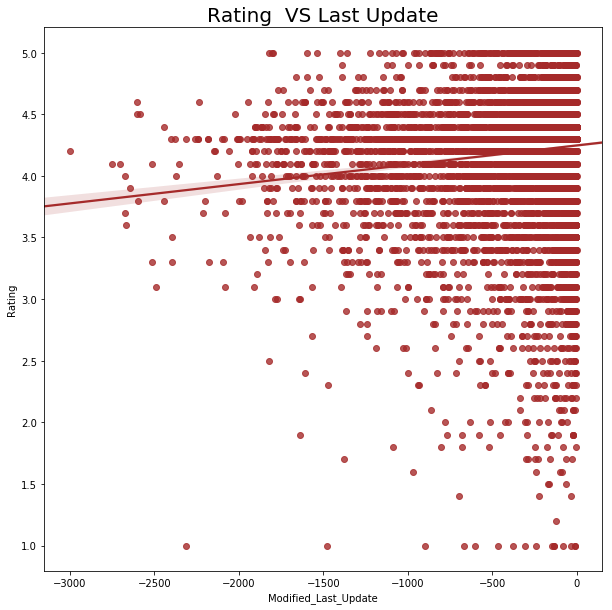

In [382]:
plt.figure(figsize = (10,10))
sns.regplot(x="Modified_Last_Update", y="Rating", color = 'brown',data=gps_df );
plt.title('Rating  VS Last Update',size = 20)

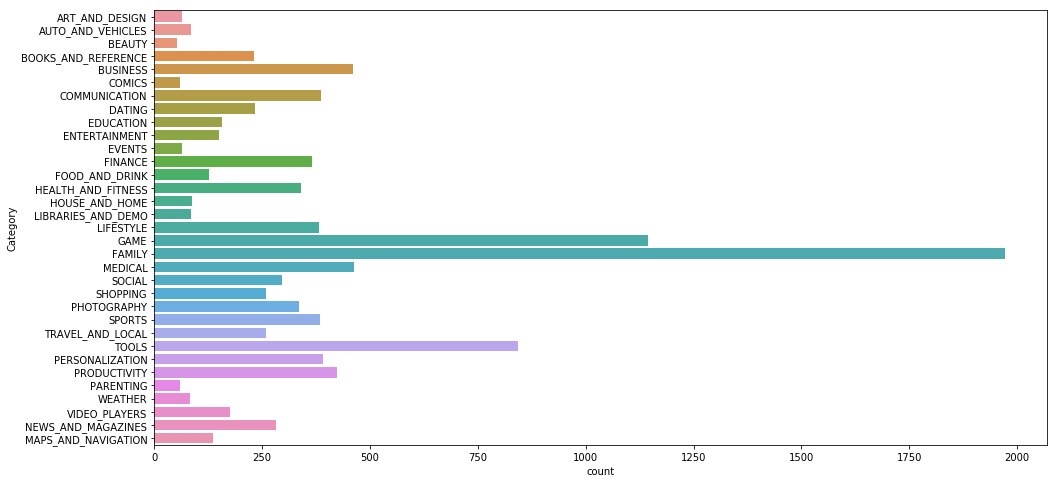

In [383]:
plt.figure(figsize=(16,8))
sns.countplot(y='Category',data=gps_df)
plt.show()

In [384]:
gps_df['Android_Ver'].head()

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
4      4.4 and up
Name: Android_Ver, dtype: object

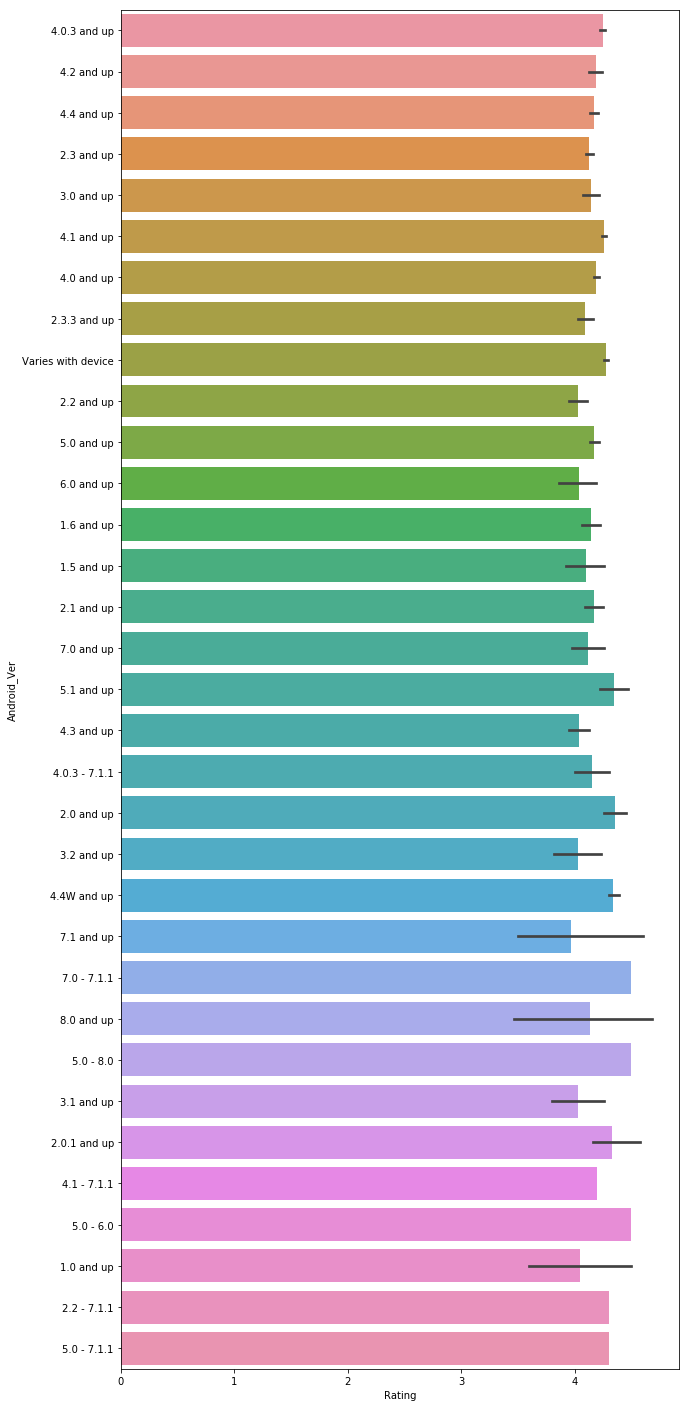

In [385]:
plt.figure(figsize=(10, 25))
sns.barplot(y='Android_Ver', x='Rating', data=gps_df)
plt.show()

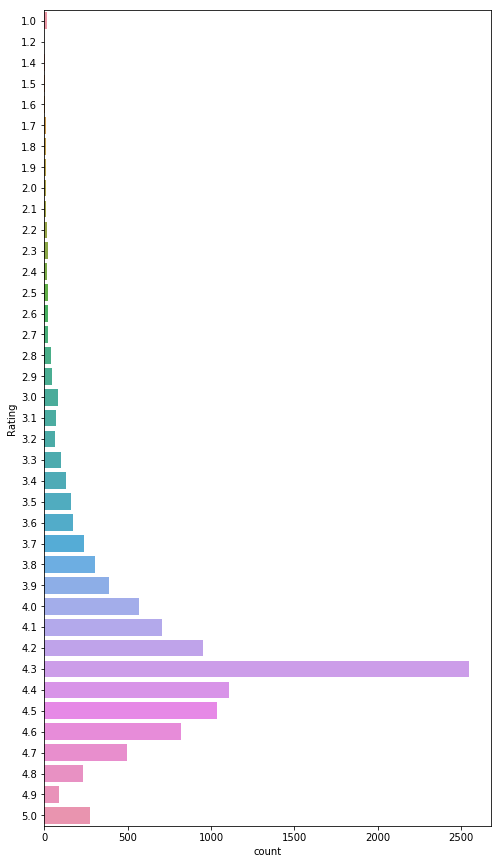

In [386]:
plt.figure(figsize=(8, 15))
sns.countplot(y='Rating',data=gps_df )
plt.show()

In [387]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Free,PriceBand,new,Modified_Last_Update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,9,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up,1,0 Free,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,12,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.00,4.0.3 and up,1,0 Free,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,14,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up,1,0 Free,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,16,Free,0.0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up,1,0 Free,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,11,Free,0.0,Everyone,Art & Design,"June 20, 2018",1.10,4.4 and up,1,0 Free,2018-06-20,-49


In [388]:
gps_df.dtypes

App                             object
Category                        object
Rating                         float64
Reviews                          int64
Size                           float64
Installs                         int64
Type                            object
Price                          float64
Content_Rating                  object
Genres                          object
Last_Updated                    object
Current_Ver                    float64
Android_Ver                     object
Free                             int64
PriceBand                       object
new                     datetime64[ns]
Modified_Last_Update             int64
dtype: object

### Data Preparation

In [389]:
## Important features for performing modeling
## category, reviews, size, install, type (free, paid), Genres, modified last update
## These are the important features that affects the mobile apps rating. Therefore dropping other columns 

feature_selected_df = gps_df
feature_selected_df.drop(['App','Price','Last_Updated','Content_Rating','Android_Ver','PriceBand','new'],axis=1,inplace=True)




C:\Users\18572\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [390]:
feature_selected_df.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Genres,Current_Ver,Free,Modified_Last_Update
0,ART_AND_DESIGN,4.1,159,19000000.0,9,Free,Art & Design,1.00,1,-213
1,ART_AND_DESIGN,3.9,967,14000000.0,12,Free,Art & Design,2.00,1,-205
2,ART_AND_DESIGN,4.7,87510,8700000.0,14,Free,Art & Design,1.24,1,-7
3,ART_AND_DESIGN,4.5,215644,25000000.0,16,Free,Art & Design,0.00,1,-61
4,ART_AND_DESIGN,4.3,967,2800000.0,11,Free,Art & Design,1.10,1,-49


In [391]:
feature_selected_df.dtypes

Category                 object
Rating                  float64
Reviews                   int64
Size                    float64
Installs                  int64
Type                     object
Genres                   object
Current_Ver             float64
Free                      int64
Modified_Last_Update      int64
dtype: object

In [392]:
# Using one hot encoding for categorical data
catgry=pd.get_dummies(feature_selected_df['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(feature_selected_df['Type'],prefix='typ',drop_first=True)
gen=pd.get_dummies(feature_selected_df['Genres'],prefix='gen',drop_first=True)
frames=[feature_selected_df,catgry,typ,gen]
feature_selected_df=pd.concat(frames,axis=1)
feature_selected_df.drop(['Category','Type','Free','Genres'],axis=1,inplace=True)

In [393]:
# feature_selected_df.head()

### Data Modeling

In [394]:
X=feature_selected_df.drop('Rating',axis=1)
y=feature_selected_df['Rating'].values
y=y.astype('int')

In [395]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [396]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

C:\Users\18572\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\18572\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\18572\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## LOGISTIC REGRESSION

In [408]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))


C:\Users\18572\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18572\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression_accuracy: 0.7878228782287823
Mean Absolute Error: 0.2444649446494465
Mean Squared Error: 0.3191881918819188
Root Mean Squared Error: 0.5649674255051514


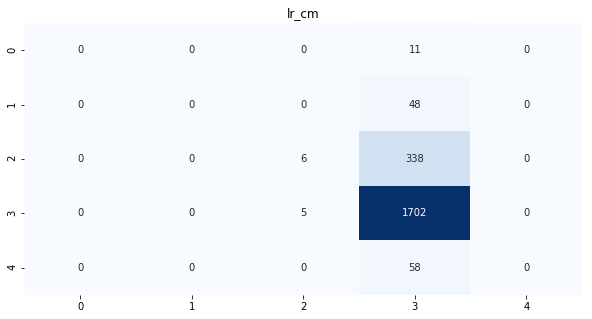

In [398]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

## DECISION TREE CLASSIFIER

In [399]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

DecisionTree_Classifier_accuracy: 0.7223247232472325
The F1 score is:  0.3181429108564551
The Precision score is:  0.3149066169374264
The Recall score is:  0.32316264739160533


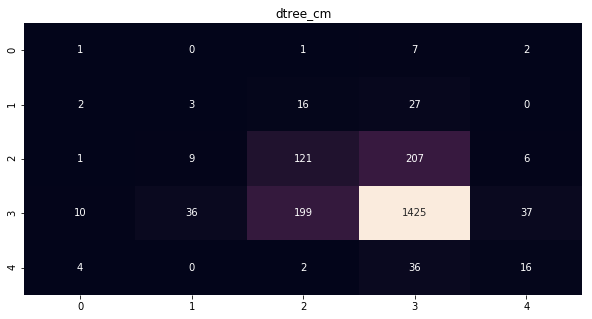

In [401]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)
print("The F1 score is: ", f1_score(y_test, dtree_pred, average="macro"))
print("The Precision score is: ",precision_score(y_test, dtree_pred, average="macro"))
print("The Recall score is: ",recall_score(y_test, dtree_pred, average="macro"))

## SVM REGRESSOR

In [100]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

SVM_regressor_accuracy: 0.7873616236162362


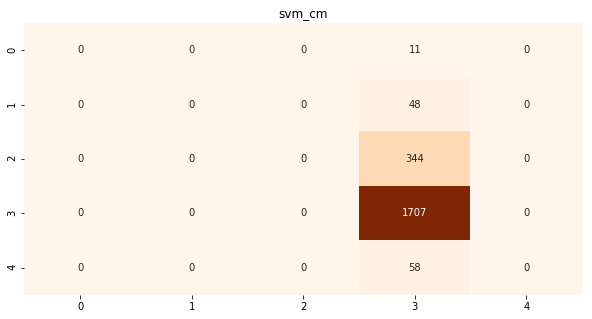

In [101]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

## RANDOM FOREST

In [407]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
print('The accuracy of the model is:',rdf_ac)
print("The F1 score is: ", f1_score(y_test, rdf_pred, average="macro"))
print("The Precision score is: ",precision_score(y_test, rdf_pred, average="macro"))
print("The Recall score is: ",recall_score(y_test, rdf_pred, average="macro")) 

import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rdf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rdf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rdf_pred)))


The accuracy of the model is: 0.775830258302583
The F1 score is:  0.33368774207483887
The Precision score is:  0.5710834354320427
The Recall score is:  0.29664216167051444
Mean Absolute Error: 0.2555350553505535
Mean Squared Error: 0.32564575645756455
Root Mean Squared Error: 0.5706537973741738


RandomForest_accuracy: 0.775830258302583


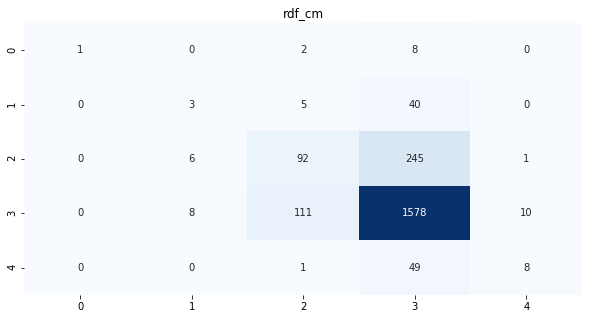

In [105]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

Text(0.5, 1.0, 'Model Accracy')

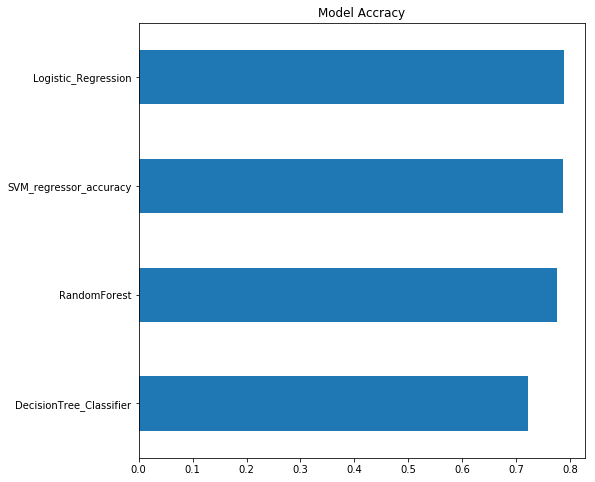

In [106]:
# Model comparison

model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')